In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/PinkWink/ML_tutorial/raw/master/dataset/ecommerce.csv'
data = pd.read_csv(url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [2]:
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [3]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<Axes: >

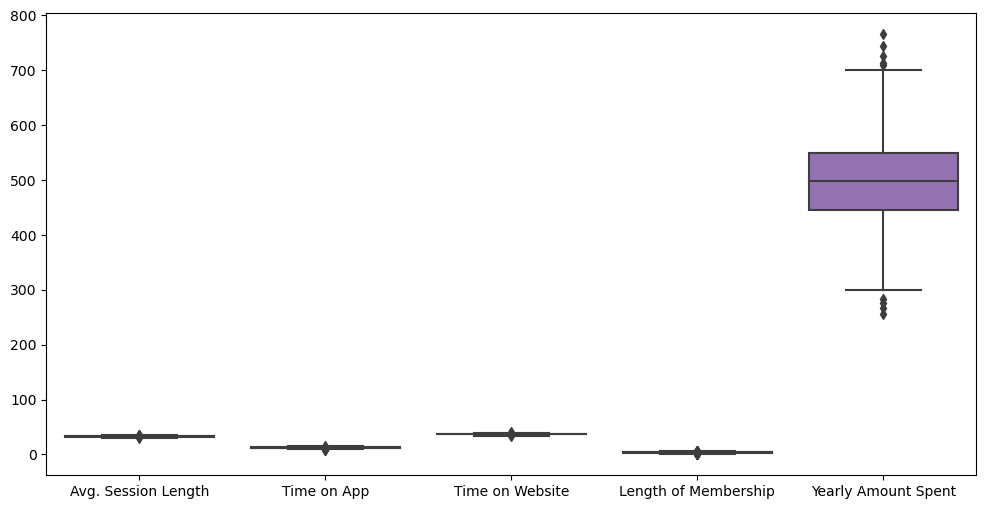

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

<Axes: >

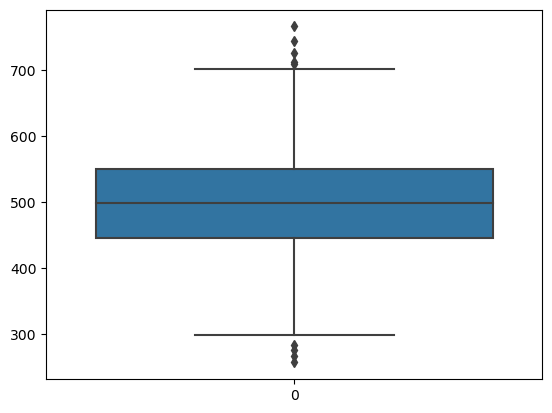

In [5]:
sns.boxplot(data=data['Yearly Amount Spent'])

<Axes: >

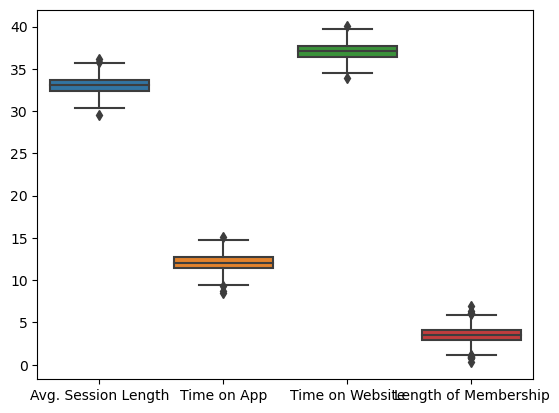

In [6]:
sns.boxplot(data=data.iloc[:, :-1])

c:\Users\mase8\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

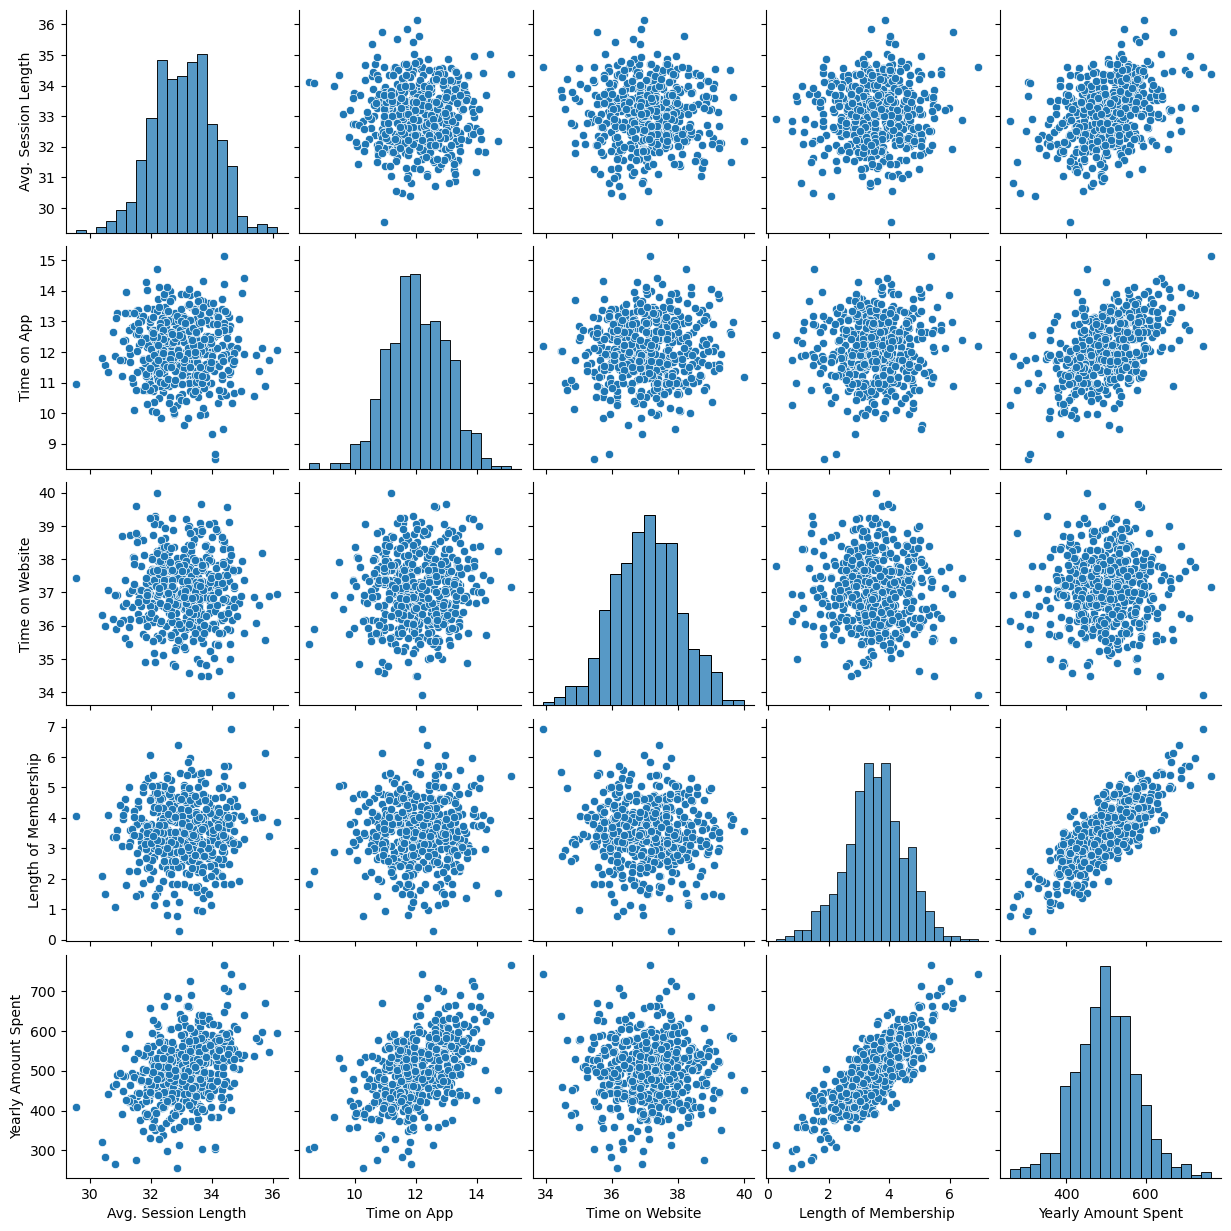

In [7]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)

c:\Users\mase8\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


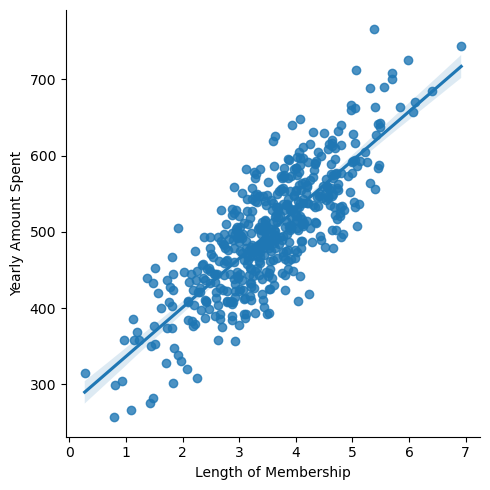

In [9]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data)

In [10]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']

lm = sm.OLS(y, X).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                         20:01:04   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 상수항이 없음

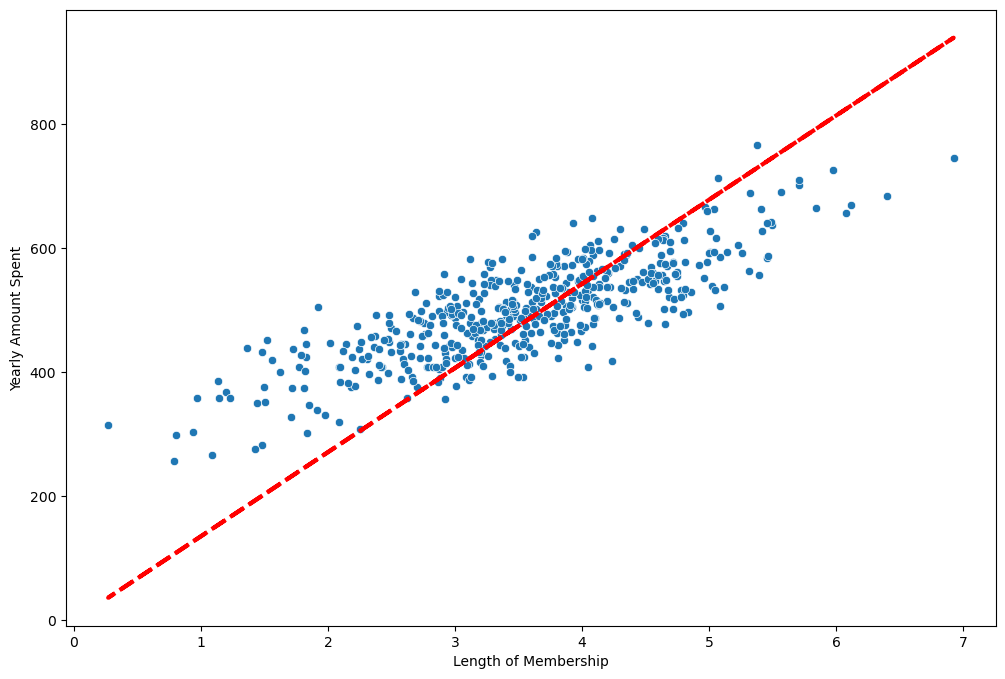

In [14]:
pred = lm.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='--', lw=3)

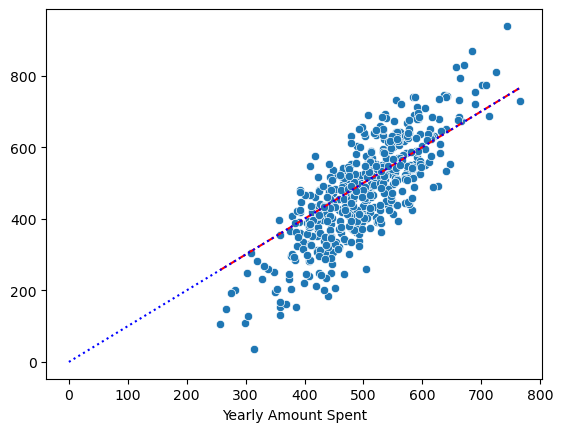

In [25]:
pred = lm.predict(X)

sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed')
plt.plot([0, max(y)], [0, max(y)], 'b', ls=':')

# plt.plot(X, pred, 'r', ls='--', lw=3)

In [27]:
X = np.c_[X, [1]*len(X)]
X

array([[4.08262063, 1.        , 1.        ],
       [2.66403418, 1.        , 1.        ],
       [4.1045432 , 1.        , 1.        ],
       ...,
       [4.95826447, 1.        , 1.        ],
       [2.33648467, 1.        , 1.        ],
       [2.73515957, 1.        , 1.        ]])

In [29]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Tue, 19 Dec 2023   Prob (F-statistic):          4.81e-117
Time:                         20:12:46   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        136.1999      3.838     35.492      0.000     128.660     143.740
x2           136.1999      3.838     35.492      0.000     128.660     143.740
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                     4.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 상수항을 추가하면서 R^2값은 떨어졌지만, AIC값도 떨어짐

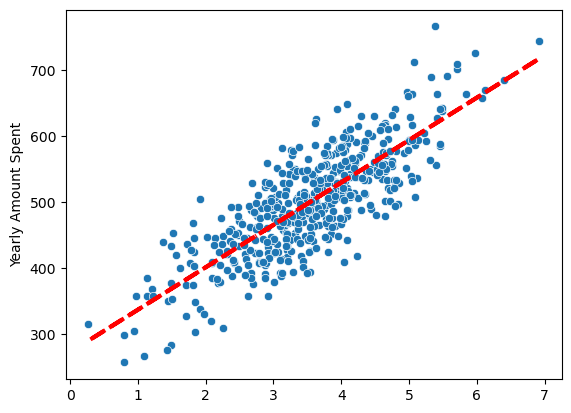

In [33]:
pred = lm.predict(X)

sns.scatterplot(x=X[:, 0], y=y)
plt.plot(X[:, 0], pred, 'r', ls='dashed', lw=3)

In [40]:
from sklearn.model_selection import train_test_split

X = data.drop(['Yearly Amount Spent'], axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [41]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                         20:32:07   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

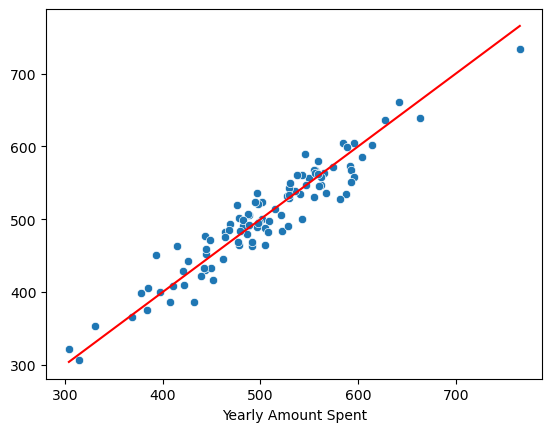

In [43]:
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')

In [44]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

lm = sm.OLS(y_train, X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     6317.
Date:                 Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                         20:40:11   Log-Likelihood:                -1486.8
No. Observations:                  400   AIC:                             2984.
Df Residuals:                      395   BIC:                             3004.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1046.8629     25.703    -40.729      0.000   -1097.395    -996.331
Avg. Session Length     25.5891      0.495     51.742      0.000      24.617      26.561
Time on App             38.6640      0.503     76.893      0.000      37.675      39.653
Time on Website          0.4313      0.499      0.864      0.388      -0.551       1.413
Length of Membership    61.8228      0.506    122.130      0.000      60.828      62.818
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.637
Skew:                          -0.022   Prob(JB):                        0.727
Kurtosis:                       3.191   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 상수항을 추가하며 R^2 값이 조금 떨어졌지만, AIC값이 크게 감소함